In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Pre-processing

## Load

In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[0], y_train[0])

Using TensorFlow backend.


(404, 13) (404,) (102, 13) (102,)
[   1.23247    0.         8.14       0.         0.538      6.142     91.7
    3.9769     4.       307.        21.       396.9       18.72   ] 15.2


## Normalize

In [3]:
import numpy as np

means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)
x_train_norm = (x_train - means) / stds

print(means.shape, stds.shape, x_train_norm.shape)
print(x_train_norm[0])

x_test_norm = (x_test - means) / stds

(13,) (13,) (404, 13)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


## Split

In [4]:
x_dev = x_train[:323, :]
x_val = x_train[323:, :]

y_dev = y_train[:323]
y_val = y_train[323:]

print(x_dev.shape, y_dev.shape)
print(x_val.shape, y_val.shape)

(323, 13) (323,)
(81, 13) (81,)


# Network Architecture

A simple 2-layer FCN with a regression output.

In [5]:
from keras.models import Sequential
from keras import layers

def create_model():
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))    
    return model

# Training

In [6]:
import utils
from keras import optimizers

Final validation mean abs error: 2.8966689463
Final validation loss: 14.0752241589


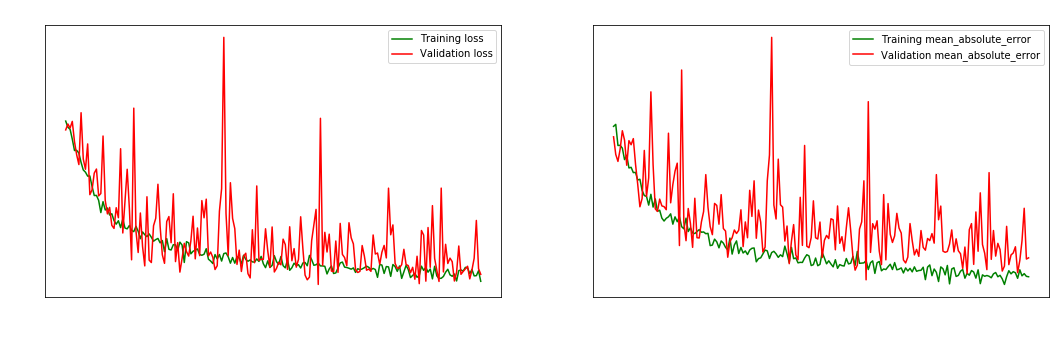

In [17]:
model = create_model()

batch_size = 1
epochs = 200
# learning_rate = 0.01
# sgd = optimizers.SGD(lr=learning_rate)
# adagrad = optimizers.Adagrad(lr=learning_rate)
# model.compile(loss='mse', optimizer=adagrad, metrics=['mae'])
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 3.82818549356
Final validation loss: 26.4945286409


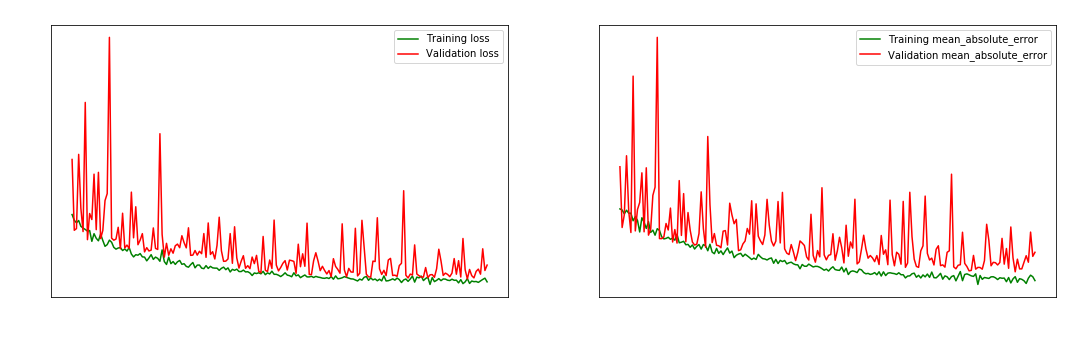

In [23]:
model = create_model()

batch_size = 8
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 4.51130862295
Final validation loss: 34.7700497192


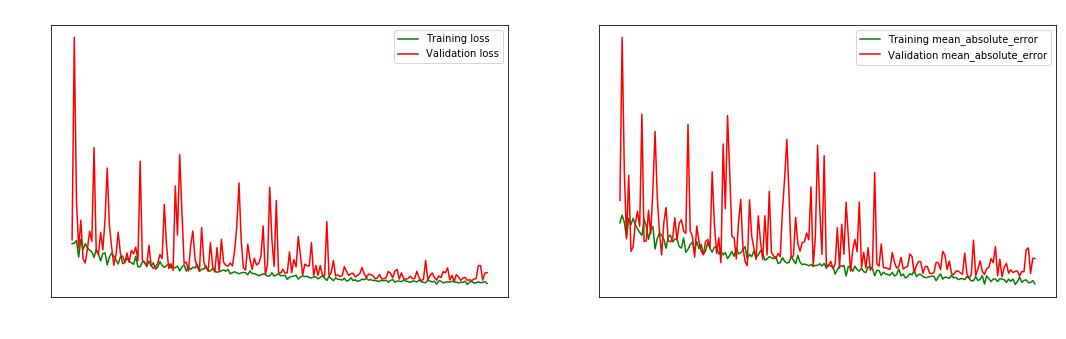

In [18]:
model = create_model()

batch_size = 16
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 4.17552030822
Final validation loss: 34.6386362712


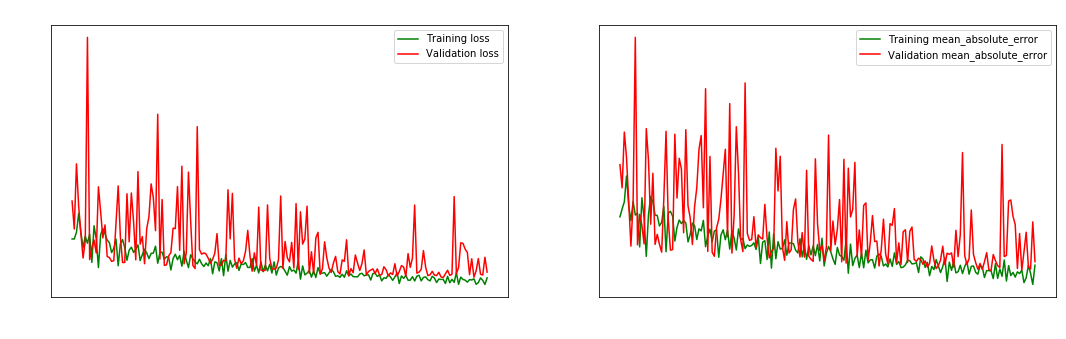

In [19]:
model = create_model()

batch_size = 32
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 5.5199120133
Final validation loss: 64.5243553585


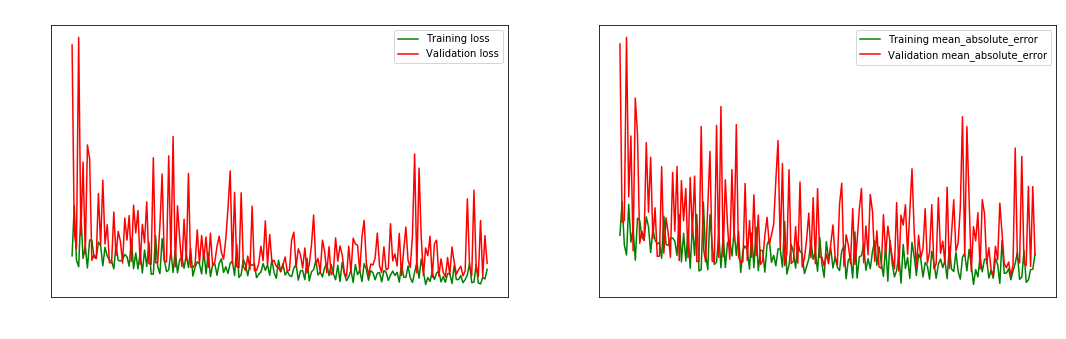

In [20]:
model = create_model()

batch_size = 64
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 10.1941795349
Final validation loss: 125.481864929


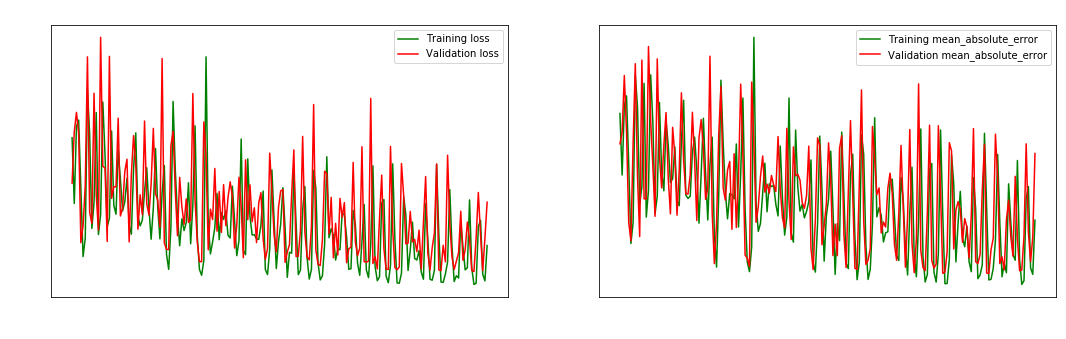

In [21]:
model = create_model()

batch_size = 128
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])

Final validation mean abs error: 6.75984382629
Final validation loss: 65.6504974365


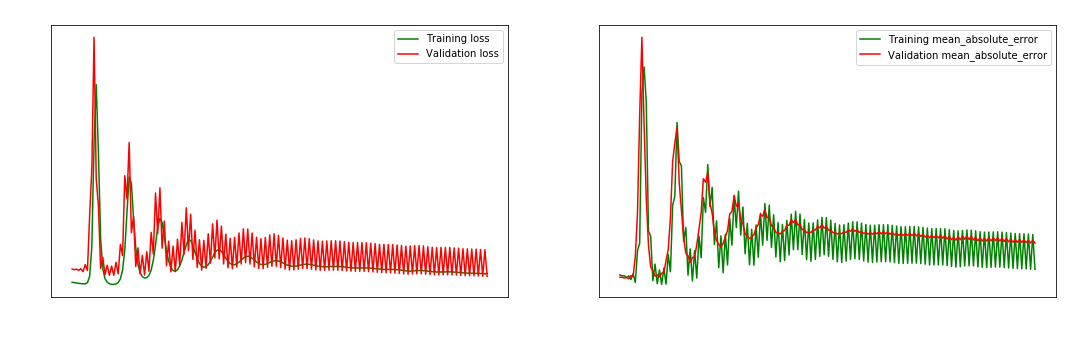

In [22]:
model = create_model()

batch_size = 323
epochs = 200
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(x_dev, y_dev, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
utils.plot(history, 'mean_absolute_error', start_ndx=10)
print('Final validation mean abs error:', history.history[f'val_mean_absolute_error'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])